In [1]:
import numpy as np
from lightfm.datasets import fetch_movielens
from lightfm import LightFM
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score

/Users/rishabhdas/Desktop/recomm/recomm/lib/python3.6/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn('LightFM was compiled without OpenMP support. '


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import math
import itertools
from collections import Counter

In [4]:
data=fetch_movielens(min_rating=4.0)

In [5]:
model=LightFM(loss="warp")
train=data["train"]
test=data["test"]

In [6]:
def print_log(row, header=False, spacing=12):
    top = ''
    middle = ''
    bottom = ''
    for r in row:
        top += '+{}'.format('-'*spacing)
        if isinstance(r, str):
            middle += '| {0:^{1}} '.format(r, spacing-2)
        elif isinstance(r, int):
            middle += '| {0:^{1}} '.format(r, spacing-2)
        elif (isinstance(r, float)
              or isinstance(r, np.float32)
              or isinstance(r, np.float64)):
            middle += '| {0:^{1}.5f} '.format(r, spacing-2)
        bottom += '+{}'.format('='*spacing)
    top += '+'
    middle += '|'
    bottom += '+'
    if header:
        print(top)
        print(middle)
        print(bottom)
    else:
        print(middle)
        print(top)

In [7]:
def learning_curve(model, train, test,iterarray,**fit_params):
    old_epoch = 0
    train_p = []
    test_p = []
    headers = ['Epoch', 'train', 'test']
    print_log(headers, header=True)
    for epoch in iterarray:
        more = epoch - old_epoch
        model.fit_partial(train,epochs=more,**fit_params)
        train_auc = auc_score(model, data["train"], num_threads=2)
        test_auc = auc_score(model, data["test"], train_interactions=data["train"], num_threads=2)
        train_p.append(np.mean(train_auc))
        test_p.append(np.mean(test_auc))
        row = [epoch, train_p[-1], test_p[-1]]
        print_log(row)
    return model, train_p, test_p

In [8]:
model = LightFM(loss='warp', random_state=2016)
# Initialize model.
model.fit(train, epochs=0);

iterarray = range(10, 110, 10)

model, train_p, test_p = learning_curve(
    model, train, test, iterarray, **{'num_threads': 4}
)

+------------+------------+------------+
|   Epoch    |   train    |    test    |
+============+============+============+
|     10     |  0.94074   |  0.92325   |
+------------+------------+------------+
|     20     |  0.95697   |  0.93241   |
+------------+------------+------------+
|     30     |  0.96311   |  0.93323   |
+------------+------------+------------+
|     40     |  0.96589   |  0.93269   |
+------------+------------+------------+
|     50     |  0.96735   |  0.93234   |
+------------+------------+------------+
|     60     |  0.96834   |  0.93184   |
+------------+------------+------------+
|     70     |  0.96903   |  0.93157   |
+------------+------------+------------+
|     80     |  0.96957   |  0.93138   |
+------------+------------+------------+
|     90     |  0.97000   |  0.93123   |
+------------+------------+------------+
|    100     |  0.97036   |  0.93120   |
+------------+------------+------------+


In [9]:
def sample_recommendation(model,data,user_ids):
    n_users,n_items=data["train"].shape

    for user_id in user_ids:
        known_positives=data["item_labels"][data["train"].tocsr()[user_id].indices]

        scores=model.predict(user_id,np.arange(n_items))

        top_items=data["item_labels"][np.argsort(-scores)]
        print("User %s" % user_id)
        print("     Known Positives:")


        for x in known_positives[:3]:
            print("       %s" % x)

        print("     Recommendations:")

        for x in top_items[:3]:
            print("       %s" % x)
            

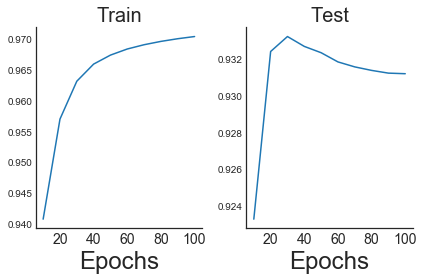

In [10]:
sns.set_style('white')

def plot_p(iterarray, p,
              title):
    plt.plot(iterarray, p);
    plt.title(title, fontsize=20);
    plt.xlabel('Epochs', fontsize=24);
    plt.xticks(fontsize=14);

# Plot train on left
ax = plt.subplot(1, 2, 1)
fig = ax.get_figure();
sns.despine(fig);
plot_p(iterarray, train_p,
         'Train')

# Plot test on right
ax = plt.subplot(1, 2, 2)
fig = ax.get_figure();
sns.despine(fig);
plot_p(iterarray, test_p,
         'Test')

plt.tight_layout();

In [14]:
sample_recommendation(model,data,[11,21,31])

User 11
     Known Positives:
       Get Shorty (1995)
       Mr. Holland's Opus (1995)
       Apollo 13 (1995)
     Recommendations:
       Schindler's List (1993)
       Braveheart (1995)
       Forrest Gump (1994)
User 21
     Known Positives:
       Get Shorty (1995)
       From Dusk Till Dawn (1996)
       Muppet Treasure Island (1996)
     Recommendations:
       Raiders of the Lost Ark (1981)
       Terminator, The (1984)
       Empire Strikes Back, The (1980)
User 31
     Known Positives:
       Twelve Monkeys (1995)
       Star Wars (1977)
       Return of the Jedi (1983)
     Recommendations:
       Scream (1996)
       Fargo (1996)
       Twelve Monkeys (1995)
